# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:**
* **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
* **balcony** — число балконов
* **ceiling_height** — высота потолков (м)
* **cityCenters_nearest** — расстояние до центра города (м)
* **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
* **first_day_exposition** — дата публикации
* **floor** — этаж
* **floors_total** — всего этажей в доме
* **is_apartment** — апартаменты (булев тип)
* **kitchen_area** — площадь кухни в квадратных метрах (м²)
* **last_price** — цена на момент снятия с публикации
* **living_area** — жилая площадь в квадратных метрах (м²)
* **locality_name** — название населённого пункта
* **open_plan** — свободная планировка (булев тип)
* **parks_around3000** — число парков в радиусе 3 км
* **parks_nearest** — расстояние до ближайшего парка (м)
* **ponds_around3000** — число водоёмов в радиусе 3 км
* **ponds_nearest** — расстояние до ближайшего водоёма (м)
* **rooms** — число комнат
* **studio** — квартира-студия (булев тип)
* **total_area** — общая площадь квартиры в квадратных метрах (м²)
* **total_images** — число фотографий квартиры в объявлении

### Открываем файл с данными и изучаем общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.describe().astype('int')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

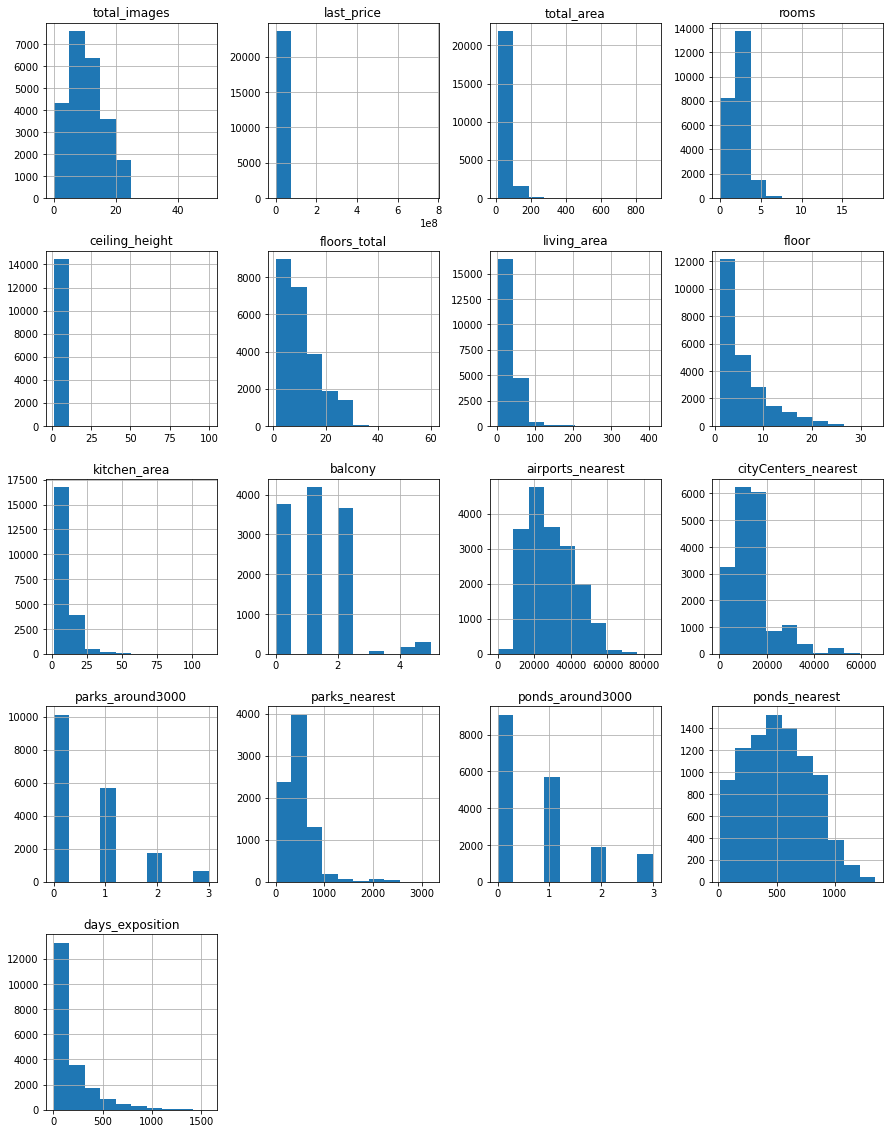

In [5]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод по общей информации:**
* столбец **first_day_exposition** должен быть типа **datetime**, а не object, т.к. это дата и время
* столбец **floors_total** должен быть типа **int**, а не float, т.к. количество этажей это целое число
* столбец **is_apartment** должен быть типа **bool**, а не object, т.к. этот столбец принимет значения True или False
* столбец **parks_around3000** должен быть типа **int**, а не object, т.к. число парков должно быть целым числом 
* столбец **ponds_around3000** должен быть типа **int**, а не object, т.к. число водоемов должно быть целым числом
* столбец **days_exposition** должен быть типа **int**, а не object, т.к. количество дней должно быть целым числом
* так же в большинстве столбцов есть неизвестные значения **NaN**

### Предобработка данных

In [6]:
data.isna().sum()#посчитали количество пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Можно увидеть, что только в 8 столбцах нету ни одного пропуска, значит со всеми остальными нужно работать

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

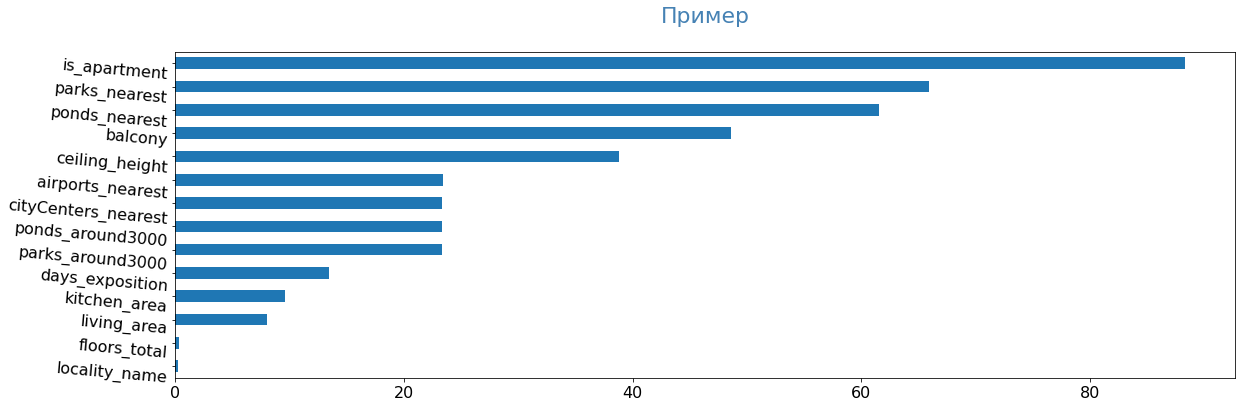

In [8]:
pass_value_barh(data)

In [9]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Вывел все уникальные значения столбца 'ceiling_height', и заметил, что встречаются неправдоподобно низкие и высокие потолки.

In [10]:
print(data.query('ceiling_height > 2.3 and ceiling_height < 5.6')['ceiling_height'].median())
data.loc[data['ceiling_height'] < 2.3, 'ceiling_height'] = 2.73
data.loc[data['ceiling_height'] > 5.6, 'ceiling_height'] = 2.73
data['ceiling_height'] = data['ceiling_height'].fillna(2.73)

2.65


Посчитал медиану значений по высоте потолков в диапозоне от 2.3м до 5.6м, т.к. я посчитал что это самые предельно допустимые значения для потолков. Потом я сразу заменил все значения потолков ниже 2.3м на значение медианы, аналогично с потолками выше 5.6м, также заполнил все пропуски медианым значением.

In [11]:
print(data.query('ceiling_height < 2.3 and ceiling_height > 5.6')['ceiling_height'].sum())
print(data['ceiling_height'].isna().sum())

0.0
0


Перепроверил, что не осталось значений ниже(2.3м) и выше(5.6м), и также перепроверил, что не осталось пропусков.

In [12]:
print(data['ceiling_height'].sort_values())
print(data['ceiling_height'].describe())

1582     2.30
5498     2.30
23498    2.30
17762    2.30
227      2.34
         ... 
464      5.20
1026     5.30
12628    5.30
7578     5.50
1388     5.60
Name: ceiling_height, Length: 23699, dtype: float64
count    23699.000000
mean         2.728156
std          0.215216
min          2.300000
25%          2.600000
50%          2.730000
75%          2.730000
max          5.600000
Name: ceiling_height, dtype: float64


Просмотрел все значения столбца заданные мною от 2.3м до 5.6м, убедился что не осталось иных значений.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

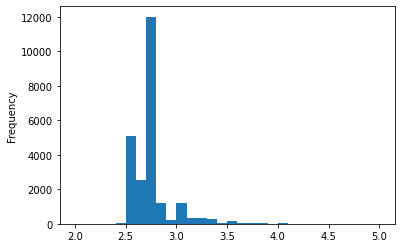

In [14]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
plt.show()

Построил график для наглядного и быстрого просмотра.

In [15]:
#переведем столбец с датой в формат даты без времени, т.к. время во всех столбцах указано как 00:00:00, т.е. его нету
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
display(data['first_day_exposition'])
data.info()

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Теперь заметим, что этот стобец стал нужного типа - datetime, и осталась только дата.

In [16]:
# check
data.floor.value_counts().to_frame()

,floor
2,3368
3,3073
1,2917
4,2804
5,2621
6,1305
7,1218
8,1083
9,1051
10,687


#### check r.3.1

In [17]:

data = data.query('floor < 26')
    

In [18]:
display(data.floor.value_counts().to_frame())


,floor
2,3368
3,3073
1,2917
4,2804
5,2621
6,1305
7,1218
8,1083
9,1051
10,687


In [19]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23212 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23212 non-null  int64         
 1   last_price            23212 non-null  float64       
 2   total_area            23212 non-null  float64       
 3   first_day_exposition  23212 non-null  datetime64[ns]
 4   rooms                 23212 non-null  int64         
 5   ceiling_height        23212 non-null  float64       
 6   floors_total          23134 non-null  float64       
 7   living_area           21350 non-null  float64       
 8   floor                 23212 non-null  int64         
 9   is_apartment          2724 non-null   object        
 10  studio                23212 non-null  bool          
 11  open_plan             23212 non-null  bool          
 12  kitchen_area          20998 non-null  float64       
 13  balcony         

In [20]:
# check
data.floor.value_counts().to_frame()

,floor
2,3368
3,3073
1,2917
4,2804
5,2621
6,1305
7,1218
8,1083
9,1051
10,687


In [21]:
# check
data.total_images.value_counts().to_frame()

,total_images
10,1766
9,1689
20,1651
8,1562
7,1492
6,1459
11,1342
5,1275
12,1200
0,1044


#### check r.5.1

In [22]:
# check
data.shape[0]

23212

In [23]:
print(data['floors_total'].isna().sum())
data.loc[data['floors_total'].isna()].head(10)
data = data.query('floors_total < 26')
data.floors_total.value_counts().to_frame()


78


,floors_total
5.0,5788
9.0,3761
16.0,1376
12.0,1362
4.0,1200
10.0,1174
6.0,914
17.0,833
3.0,668
7.0,592


In [24]:
# check
data.shape[0]

20931

В столбце количества этажей 86 пропусков, но с ними я не буду ничего делать, т.к. невозможно даже по всем остальным параметрам предположить сколько всего этажей в доме, а медиана не подойдет, т.к. если я заполню пропуски количества этажей в доме медианой, то может оказатся, что этаж на котором расположена квартира будет больше чем количество всего этажей в этом доме, поэтому оставил этот столбец пока без изменений.

In [25]:
display(data['rooms'].unique())
display(data['rooms'].isna().sum())
display(data.query('rooms == 0')['rooms'].count())
display(data.query('rooms == 0').head(10))
data = data.query('rooms < 8')
display(data.rooms.value_counts().to_frame())


array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16])

0

129

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27,0,2.73,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,2.73,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20,0,2.73,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20,0,2.73,18.0,NaN,8,NaN,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5.0,15.00,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1220,5,3300000.0,27.00,2017-11-10,0,2.80,17.0,20.00,16,NaN,...,NaN,NaN,Санкт-Петербург,12507.0,12419.0,0.0,NaN,1.0,528.0,113.0
1260,0,2600000.0,27.00,2018-07-20,0,2.70,16.0,16.00,4,NaN,...,NaN,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,102.0
1528,8,1950000.0,31.00,2019-01-29,0,2.73,18.0,18.00,11,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1574,0,2200000.0,22.00,2017-11-03,0,2.73,18.0,15.00,16,NaN,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0


,rooms
2,7153
1,6627
3,5365
4,1149
5,315
0,129
6,104
7,59


В столбце с комнатами увидел, что есть значения 0, и решил выяснить с чем это связано, в итоге я предполагаю что это не квартиры, а студии, т.к. очень маленькая площадь и ни в одних значениях нету кухни, поэтому предположу что в таком случае ошибки нету и оставим все как есть.

In [26]:
print(data['living_area'].describe())
data.query('living_area < 5')

count    19283.000000
mean        35.059198
std         21.664162
min          2.000000
25%         19.000000
50%         30.400000
75%         43.000000
max        347.500000
Name: living_area, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,2.73,17.0,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6.0,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8.0,3.0,8,NaN,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Посмотрел всю числовую информауию столбца жилой площади и заметил, что минимальная площадь слишком неправдоподобная, поэтому решил посмотреть все параметиры этих значений жилой площади, которые меньше 5 квадратных метров, т.к. я считаю что такие размеры нереалистичны.

#### check r.4.1

In [27]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20901 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20901 non-null  int64         
 1   last_price            20901 non-null  float64       
 2   total_area            20901 non-null  float64       
 3   first_day_exposition  20901 non-null  datetime64[ns]
 4   rooms                 20901 non-null  int64         
 5   ceiling_height        20901 non-null  float64       
 6   floors_total          20901 non-null  float64       
 7   living_area           19283 non-null  float64       
 8   floor                 20901 non-null  int64         
 9   is_apartment          2462 non-null   object        
 10  studio                20901 non-null  bool          
 11  open_plan             20901 non-null  bool          
 12  kitchen_area          19016 non-null  float64       
 13  balcony         

In [28]:
data.loc[data['living_area'] < 5, 'living_area'] = None
print(data['living_area'].isna().sum())
display(data.query('living_area < 5'))
data = data.query('living_area < 150 or living_area.isna()')
display(data.living_area.value_counts().to_frame())
data['living_area'] = data['living_area'].astype('Float64')


1621


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,living_area
18.000000,750
17.000000,583
30.000000,558
20.000000,412
28.000000,403
...,...
27.380001,1
58.820000,1
119.900000,1
32.370000,1


In [29]:
# check
display(data.shape)
data['living_area'].isna().sum()

(20803, 22)

1621

Я считаю, то что нельзя заменить эти значения на медиану или какое-то конкретно значения, т.к. это очень индивидуальные размеры под каждый размер квартиры, но и оставлять их лучше не стоит, поэтому я все значения, которые меньше 5 заменил на 'None', чтобы в итоге они заполнились как отсутствующие значения, и потом еще раз перепроверил, что выводится если жилая площадь меньше 5. А удалять я их не стал, т.к. значений достаточно много(1907) и чтобы в дальнейшем не изменилась статистика по этим квартирам, я оставил их так.

In [30]:
print(data['kitchen_area'].describe())
data.query('kitchen_area < 5')

count    18924.000000
mean        10.241562
std          5.698149
min          1.300000
25%          7.000000
50%          9.000000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
76,12,2800000.0,55.1,2016-05-14,3,2.60,5.0,38.4,1,NaN,...,4.9,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.0
298,9,2650000.0,42.8,2017-04-25,2,2.73,5.0,30.0,3,NaN,...,4.5,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,49.0
422,8,1700000.0,55.2,2018-03-24,3,2.50,5.0,38.5,5,NaN,...,4.5,NaN,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1327,6,2650000.0,46.2,2016-12-01,2,2.50,5.0,29.2,5,NaN,...,4.9,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,704.0
1834,4,1400000.0,43.0,2019-03-28,2,2.50,5.0,30.0,2,NaN,...,4.5,NaN,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22675,9,2600000.0,42.4,2017-08-18,2,2.50,5.0,27.6,5,NaN,...,4.8,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,116.0
22839,14,3350000.0,27.0,2018-11-03,1,2.70,16.0,<NA>,6,False,...,4.0,2.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,35.0
23110,1,2900000.0,34.0,2018-02-01,2,2.90,2.0,20.0,1,NaN,...,4.0,NaN,посёлок Стрельна,27006.0,23832.0,0.0,NaN,2.0,872.0,196.0
23498,7,1600000.0,54.0,2016-12-26,2,2.30,1.0,33.0,1,False,...,3.5,0.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,281.0


Аналогично с жилой площадью, вывел всю числовую информацию по площади кухни, и тут тоже увидел неправдободобно маленький минимум для кухни, поэтому я сразу сделал срез значений меньше 5, т.к. считаю кухню 5 квадратных метров минимално правдоподобной.

In [31]:
print(data['kitchen_area'].isna().sum())

1879


Посмотрел количество пропусков в этом столбце.

In [32]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)
median_kitchen = data.query('kitchen_area > 5' and 'kitchen_area < 15')['kitchen_area'].median()
data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = median_kitchen
display(data.kitchen_area.value_counts().to_frame())

,kitchen_area
8.00,3031
6.00,1297
7.00,1056
10.00,1006
9.00,997
...,...
55.70,1
14.29,1
31.60,1
32.40,1


Заполнил все пропуски 0, т.к. я предпологаю если нету информации про площадь кухни, то это может быть связано с квартирами где комнаты и кухня объединнены, поэтому ее площадь включенена в общую площадь, следовательно про площадь кухни нету информации. Затем заполнил все значения, которые меньше 5 медианым значением, чтобы были правдоподобные значения, также заполнил пропуски медианым значением.

In [33]:
data.query('kitchen_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Проверил, что не осталось значений площади кухни меньше 5.

In [34]:
data = data.query('kitchen_area < 30 or kitchen_area.isna()')
display(data.kitchen_area.value_counts().to_frame())
data['kitchen_area'] = data['kitchen_area'].astype('Float64')


,kitchen_area
8.00,3031
6.00,1297
7.00,1056
10.00,1006
9.00,997
...,...
18.93,1
14.29,1
13.06,1
5.28,1


In [35]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1599
floor                       0
is_apartment            18079
studio                      0
open_plan                   0
kitchen_area                0
balcony                 10108
locality_name              37
airports_nearest         5022
cityCenters_nearest      5010
parks_around3000         5009
parks_nearest           13186
ponds_around3000         5009
ponds_nearest           12659
days_exposition          2822
dtype: int64

#### check r.2.1

In [36]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20490 non-null  int64         
 1   last_price            20490 non-null  float64       
 2   total_area            20490 non-null  float64       
 3   first_day_exposition  20490 non-null  datetime64[ns]
 4   rooms                 20490 non-null  int64         
 5   ceiling_height        20490 non-null  float64       
 6   floors_total          20490 non-null  float64       
 7   living_area           18891 non-null  Float64       
 8   floor                 20490 non-null  int64         
 9   is_apartment          2411 non-null   object        
 10  studio                20490 non-null  bool          
 11  open_plan             20490 non-null  bool          
 12  kitchen_area          20490 non-null  Float64       
 13  balcony         

In [38]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20490 non-null  int64         
 1   last_price            20490 non-null  float64       
 2   total_area            20490 non-null  float64       
 3   first_day_exposition  20490 non-null  datetime64[ns]
 4   rooms                 20490 non-null  int64         
 5   ceiling_height        20490 non-null  float64       
 6   floors_total          20490 non-null  float64       
 7   living_area           18891 non-null  Float64       
 8   floor                 20490 non-null  int64         
 9   is_apartment          2411 non-null   object        
 10  studio                20490 non-null  bool          
 11  open_plan             20490 non-null  bool          
 12  kitchen_area          20490 non-null  Float64       
 13  balcony         

In [39]:
# check

data[data['total_area']*0.9 <= (data ['living_area']+data ['kitchen_area'])][['total_area'
                                                                                  ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
319,59.7,47.4,6.4
349,25.0,17.0,8.0
...,...,...,...
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3
23579,24.8,18.0,8.0


In [40]:
print(data['balcony'].describe())
print(data['balcony'].isna().sum())
data.loc[data['balcony'].isna()]

count    10382.000000
mean         1.122038
std          1.064185
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64
10108


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
5,10,2890000.0,30.40,2018-09-10,1,2.73,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,NaN,...,8.5,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
16,11,6700000.0,82.00,2017-11-23,3,3.05,5.0,55.6,1,NaN,...,9.0,NaN,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
19,16,14200000.0,121.00,2019-01-09,3,2.75,16.0,76.0,8,NaN,...,12.0,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.73,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.73,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.73,3.0,29.7,1,NaN,...,8.0,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Заметил, то что пропуски в этом столбце занимают большую часть, значит явно они здесь не случайно, следовательно этим скорее всего хотели передать, то что балконов в той или иной квартире нету, также вывел пропуски этого столбца, чтобы удостоверится наверника, что нету никакой зависимости с другими параметрами.

In [41]:
# data['balcony'] = data['balcony'].fillna(0).astype('Int64')
print(data['balcony'].isna().sum())
data.info()

10108
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20490 non-null  int64         
 1   last_price            20490 non-null  float64       
 2   total_area            20490 non-null  float64       
 3   first_day_exposition  20490 non-null  datetime64[ns]
 4   rooms                 20490 non-null  int64         
 5   ceiling_height        20490 non-null  float64       
 6   floors_total          20490 non-null  float64       
 7   living_area           18891 non-null  Float64       
 8   floor                 20490 non-null  int64         
 9   is_apartment          2411 non-null   object        
 10  studio                20490 non-null  bool          
 11  open_plan             20490 non-null  bool          
 12  kitchen_area          20490 non-null  Float64       
 13  balcony   

Заполнил пропуски 0 вместо NaN, чтобы поменять тип столбца на int, т.к. с ним удобнее работать и также 0 намного понятнее показывает что балконов нет. Затем проверил не осталось ли значений NaN.

In [42]:
print(data['locality_name'].value_counts().sample(20))
data['locality_name'] = data['locality_name'].str.lower()
print(data['locality_name'].duplicated().sum())
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

поселок Углово                               7
посёлок Жилгородок                           2
поселок станции Приветнинское                2
деревня Разбегаево                           4
городской посёлок Будогощь                   4
поселок Лесное                               2
поселок городского типа Кондратьево          1
Сосновый Бор                                87
поселок Почап                                1
посёлок городского типа Рощино              15
посёлок Плоское                              1
поселок городского типа имени Свердлова     24
посёлок Металлострой                        65
городской посёлок Советский                  2
поселок Глебычево                            3
деревня Колтуши                             11
посёлок Гаврилово                            4
посёлок Репино                               3
поселок Победа                               3
Сестрорецк                                 176
Name: locality_name, dtype: int64
20125


Посмотрел 20 рандомных значений названий населеного пункта, и увидел что почти каждое значение в разном регистре, поэтому привел все значения к нижнему регистру, затем я посчитал количество дубликатов, и увидел, то что есть одинаковые названия пунктов только в одном значение написано слово 'поселок' через 'е', а в другом через 'ё', поэтому привел все значения к одному 'посёлок'.

In [43]:
# check
data['locality_name'].nunique()

330

In [44]:

print(data['airports_nearest'].value_counts())
print(data['airports_nearest'].describe())
data.query('airports_nearest == 0')

37434.0    58
39946.0    28
37407.0    27
44870.0    27
39140.0    24
           ..
17323.0     1
10811.0     1
11506.0     1
32131.0     1
20875.0     1
Name: airports_nearest, Length: 7851, dtype: int64
count    15468.000000
mean     28444.969615
std      12349.442128
min          0.000000
25%      18514.000000
50%      26329.000000
75%      36733.500000
max      84869.000000
Name: airports_nearest, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Вывел числовое описание столбца ближайших аэропортов и заметил, то что минимальное значение равно 0, т.е. у кого то дом находится прям в аэропорту, но такого быть не может, поэтому скорее всего это ошибка.

In [45]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Заменил ошибочное значение на None, чтобы не мешало. И перепроверил, что ошибочное значение заменилось на пустую строку.

In [46]:
data['airports_nearest'].min()

6450.0

Вывел самый ближайший аэропорт к квартире, который находится в 6450м.

In [47]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)
print(data.columns)
data['city_centers_nearest'].isna().sum()

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


5010

Привел название столбца расстояния до центра города в змеиный регистр. И проверил, изменилось ли. Также проверил на наличие пропусков, и их оказалось достаточно много, но предположить почему нету значений сложно, т.к. это может быть ошибкой выгрузки данных или кто-то просто не указал значения, поэтому оставлю пока так.

In [48]:
print(data['ponds_around3000'].value_counts())
data['ponds_around3000'].describe()

0.0    7650
1.0    4779
2.0    1702
3.0    1350
Name: ponds_around3000, dtype: int64


count    15481.000000
mean         0.790194
std          0.953389
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

Вывел уникальные значения столбца ближайших водоёмов,и увидел то что больше половины значений это NaN.

In [49]:

print(data.info())
data['ponds_around3000'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20490 non-null  int64         
 1   last_price            20490 non-null  float64       
 2   total_area            20490 non-null  float64       
 3   first_day_exposition  20490 non-null  datetime64[ns]
 4   rooms                 20490 non-null  int64         
 5   ceiling_height        20490 non-null  float64       
 6   floors_total          20490 non-null  float64       
 7   living_area           18891 non-null  Float64       
 8   floor                 20490 non-null  int64         
 9   is_apartment          2411 non-null   object        
 10  studio                20490 non-null  bool          
 11  open_plan             20490 non-null  bool          
 12  kitchen_area          20490 non-null  Float64       
 13  balcony         

5009

Заменил все пропущенные значения на 0, т.к. я предполагаю, что пропущенные значения обозначали, то что в радиусе 3 км нету водоёма, затем для удобства заменил тип данных на int. Также перепроверил, не осталось ли пропущенных значений.

In [50]:
print(data['ponds_nearest'].value_counts())
data['ponds_nearest'].describe()

427.0     66
433.0     38
454.0     36
153.0     34
303.0     34
          ..
845.0      1
1313.0     1
596.0      1
1207.0     1
995.0      1
Name: ponds_nearest, Length: 1087, dtype: int64


count    7831.000000
mean      524.108160
std       276.281965
min        13.000000
25%       303.000000
50%       510.000000
75%       734.500000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [51]:

print(data.info())
data['ponds_nearest'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20490 non-null  int64         
 1   last_price            20490 non-null  float64       
 2   total_area            20490 non-null  float64       
 3   first_day_exposition  20490 non-null  datetime64[ns]
 4   rooms                 20490 non-null  int64         
 5   ceiling_height        20490 non-null  float64       
 6   floors_total          20490 non-null  float64       
 7   living_area           18891 non-null  Float64       
 8   floor                 20490 non-null  int64         
 9   is_apartment          2411 non-null   object        
 10  studio                20490 non-null  bool          
 11  open_plan             20490 non-null  bool          
 12  kitchen_area          20490 non-null  Float64       
 13  balcony         

12659

Больше половины данных не имеют значения(14589), т.е. эти водоёмы находятся дальше чем 3км, поэтому я их заменил на 0, затем изменил тип данных на int, приблизитнльно только 1/3 из всех водоёмов находится в радиусе 3км.

In [52]:
print(data['parks_around3000'].value_counts())
print(data['parks_around3000'].describe())
data.query('parks_around3000 == 0')

0.0    8181
1.0    5147
2.0    1571
3.0     582
Name: parks_around3000, dtype: int64
count    15481.000000
mean         0.648214
std          0.810309
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04,1,2.73,11.0,18.6,1,NaN,...,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,6.5,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27,2,2.73,5.0,31.0,4,False,...,6.0,1.0,ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
14,1,4400000.0,36.0,2016-06-23,1,2.73,6.0,17.0,1,NaN,...,8.0,0.0,пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
17,6,4180000.0,36.0,2016-09-09,1,2.73,17.0,16.5,7,NaN,...,11.0,1.0,санкт-петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23678,10,3500000.0,43.0,2016-05-19,2,2.50,3.0,26.1,2,False,...,8.0,1.0,пушкин,15823.0,27977.0,0.0,NaN,1.0,1134.0,252.0
23680,14,5000000.0,59.0,2019-04-04,3,2.50,5.0,52.0,1,NaN,...,7.0,NaN,санкт-петербург,26835.0,11878.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24,1,2.50,5.0,17.3,5,NaN,...,5.6,1.0,ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23687,6,3200000.0,39.0,2017-12-16,1,2.73,9.0,20.0,6,NaN,...,11.0,2.0,санкт-петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0


Проанализировал данные, я увидел, что почти половина значений это нули, и я предположил, что это все парки которые за радиусом 3км.

In [53]:
data['parks_around3000'].isna().sum()

5009

In [54]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20490 non-null  int64         
 1   last_price            20490 non-null  float64       
 2   total_area            20490 non-null  float64       
 3   first_day_exposition  20490 non-null  datetime64[ns]
 4   rooms                 20490 non-null  int64         
 5   ceiling_height        20490 non-null  float64       
 6   floors_total          20490 non-null  float64       
 7   living_area           18891 non-null  Float64       
 8   floor                 20490 non-null  int64         
 9   is_apartment          2411 non-null   object        
 10  studio                20490 non-null  bool          
 11  open_plan             20490 non-null  bool          
 12  kitchen_area          20490 non-null  Float64       
 13  balcony         

Заменил все пропуски на 0, и преобразовал данные в тип int

In [55]:
data.query('parks_around3000 == 0').count()

total_images            8181
last_price              8181
total_area              8181
first_day_exposition    8181
rooms                   8181
ceiling_height          8181
floors_total            8181
living_area             7666
floor                   8181
is_apartment             996
studio                  8181
open_plan               8181
kitchen_area            8181
balcony                 4339
locality_name           8167
airports_nearest        8176
city_centers_nearest    8181
parks_around3000        8181
parks_nearest              4
ponds_around3000        8181
ponds_nearest           3440
days_exposition         7220
dtype: int64

Заметил то что количество нулей примерно 2/3 всех значений столбца парков в радиусе 3км, т.е. я предположил, что все нули которые изначально были, и пропуски которые я превратил в нули, это все парки, которые находятся дальше 3км.

In [56]:

print(data['parks_nearest'].value_counts())
print(data['parks_nearest'].describe())
data['parks_nearest'].isna().sum()

441.0     64
456.0     38
392.0     38
173.0     37
471.0     30
          ..
727.0      1
808.0      1
1077.0     1
2348.0     1
929.0      1
Name: parks_nearest, Length: 974, dtype: int64
count    7304.000000
mean      487.162924
std       339.037058
min         1.000000
25%       288.000000
50%       451.000000
75%       607.000000
max      3190.000000
Name: parks_nearest, dtype: float64


13186

Вевел, что количество отсутствующих значений(15620) по приближённости парка, значит эти все парки находятся за нашим радиусом.

In [57]:

print(data.info())
data['parks_nearest'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20490 non-null  int64         
 1   last_price            20490 non-null  float64       
 2   total_area            20490 non-null  float64       
 3   first_day_exposition  20490 non-null  datetime64[ns]
 4   rooms                 20490 non-null  int64         
 5   ceiling_height        20490 non-null  float64       
 6   floors_total          20490 non-null  float64       
 7   living_area           18891 non-null  Float64       
 8   floor                 20490 non-null  int64         
 9   is_apartment          2411 non-null   object        
 10  studio                20490 non-null  bool          
 11  open_plan             20490 non-null  bool          
 12  kitchen_area          20490 non-null  Float64       
 13  balcony         

13186

Превратил все пропуски в 0, затем преобразовал тип данных в int, и перепроверил не осталось ли пропусков.

In [58]:
print(data['days_exposition'].describe())
print(data.info())
print(data['days_exposition'].isna().sum())
print(data.query('days_exposition == "NaN"'))
data = data.query('days_exposition < 360 or days_exposition.isna()')
display(data.days_exposition.value_counts().to_frame())
data['days_exposition'] = data['days_exposition'].astype('Float64')


count    17668.000000
mean       180.378085
std        218.159734
min          1.000000
25%         45.000000
50%         95.500000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20490 non-null  int64         
 1   last_price            20490 non-null  float64       
 2   total_area            20490 non-null  float64       
 3   first_day_exposition  20490 non-null  datetime64[ns]
 4   rooms                 20490 non-null  int64         
 5   ceiling_height        20490 non-null  float64       
 6   floors_total          20490 non-null  float64       
 7   living_area           18891 non-null  Float64       
 8   floor                 20490 non-null  int64         
 9   is_apartment          2411 non-nul

,days_exposition
45.0,782
60.0,431
7.0,207
30.0,179
90.0,171
...,...
171.0,24
177.0,21
148.0,14
2.0,3


Я думаю, что в столбце с объявлениями где значения NaN, подразумевается что объявление еще висит, его не сняли, поэтому нету информации, а так не видно в этом столбце каких-нибудь аномальных значений.

In [59]:
print(data['is_apartment'].unique())
print(data['is_apartment'].value_counts())
data['is_apartment'].isna().sum()

[nan False True]
False    1522
True       35
Name: is_apartment, dtype: int64


13314

Вывел уникальные значения столбца апартаменты и увидел в нем NaN, которое встречается 20924 раза, это почти сколько всего значений в столбце, следовательно я предположил, что пропущенные значения могут означать, что наши значения по продаже квартир не относятся к апартаментам.

In [60]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].unique())
print(data['is_apartment'].isna().sum())
data.info()

[False  True]
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14871 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14871 non-null  int64         
 1   last_price            14871 non-null  float64       
 2   total_area            14871 non-null  float64       
 3   first_day_exposition  14871 non-null  datetime64[ns]
 4   rooms                 14871 non-null  int64         
 5   ceiling_height        14871 non-null  float64       
 6   floors_total          14871 non-null  float64       
 7   living_area           13561 non-null  Float64       
 8   floor                 14871 non-null  int64         
 9   is_apartment          14871 non-null  bool          
 10  studio                14871 non-null  bool          
 11  open_plan             14871 non-null  bool          
 12  kitchen_area          14871 non-null  Float64       
 13  

Я заменил все неизветные значения на False, т.к. это и означает что данные значения не относятся к апартаментам, и тогда следовательно столбец с апартаментами принял тип bool.

In [61]:
display(data['last_price'].value_counts())
data = data.query('last_price < 25000000')
display(data.last_price.value_counts().to_frame())


4500000.0     221
3500000.0     195
3600000.0     191
4000000.0     180
4300000.0     172
             ... 
20295200.0      1
4010000.0       1
7365000.0       1
4974820.0       1
4510000.0       1
Name: last_price, Length: 1954, dtype: int64

,last_price
4500000.0,221
3500000.0,195
3600000.0,191
4000000.0,180
4300000.0,172
...,...
21280000.0,1
9295000.0,1
3469000.0,1
3015000.0,1


In [62]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14701 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14701 non-null  int64         
 1   last_price            14701 non-null  float64       
 2   total_area            14701 non-null  float64       
 3   first_day_exposition  14701 non-null  datetime64[ns]
 4   rooms                 14701 non-null  int64         
 5   ceiling_height        14701 non-null  float64       
 6   floors_total          14701 non-null  float64       
 7   living_area           13427 non-null  Float64       
 8   floor                 14701 non-null  int64         
 9   is_apartment          14701 non-null  bool          
 10  studio                14701 non-null  bool          
 11  open_plan             14701 non-null  bool          
 12  kitchen_area          14701 non-null  Float64       
 13  balcony         

**Вывод по предобработке данных:**

In [63]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>
1,7,3350000.0,40.4,2018-12-04,1,2.73,11.0,18.6,1,False,...,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.4,2018-09-10,1,2.73,12.0,14.4,5,False,...,9.1,NaN,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,8.5,NaN,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
11,9,3300000.0,44.0,2018-08-27,2,2.73,5.0,31.0,4,False,...,6.0,1.0,ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0


Я могу сказать, что почти в каждом столбце очень много пропущенных, неизвестных значений, что может повлиять на статистику и построение отношений между значениями.

In [64]:
data = data.query('total_area < 200')
data.total_area.value_counts().to_frame()
data['total_area'] = data['total_area'].astype('Float64')


#### check r.2.2

In [65]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14680 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14680 non-null  int64         
 1   last_price            14680 non-null  float64       
 2   total_area            14680 non-null  Float64       
 3   first_day_exposition  14680 non-null  datetime64[ns]
 4   rooms                 14680 non-null  int64         
 5   ceiling_height        14680 non-null  float64       
 6   floors_total          14680 non-null  float64       
 7   living_area           13410 non-null  Float64       
 8   floor                 14680 non-null  int64         
 9   is_apartment          14680 non-null  bool          
 10  studio                14680 non-null  bool          
 11  open_plan             14680 non-null  bool          
 12  kitchen_area          14680 non-null  Float64       
 13  balcony         

In [66]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"14,680.00","14,680.00","14,680.00","11,942.00","14,680.00","13,410.00","14,680.00","14,680.00","14,680.00"
min,0.00,13.00,2.30,1.00,"430,000.00",5.40,5.00,1.00,1.00
max,7.00,199.20,5.30,179.00,"24,821,600.00",147.20,29.90,20.00,20.00


In [67]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14680 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14680 non-null  int64         
 1   last_price            14680 non-null  float64       
 2   total_area            14680 non-null  Float64       
 3   first_day_exposition  14680 non-null  datetime64[ns]
 4   rooms                 14680 non-null  int64         
 5   ceiling_height        14680 non-null  float64       
 6   floors_total          14680 non-null  float64       
 7   living_area           13410 non-null  Float64       
 8   floor                 14680 non-null  int64         
 9   is_apartment          14680 non-null  bool          
 10  studio                14680 non-null  bool          
 11  open_plan             14680 non-null  bool          
 12  kitchen_area          14680 non-null  Float64       
 13  balcony         

In [68]:
# check
data.rooms.value_counts().to_frame()

,rooms
2,5221
1,4971
3,3569
4,621
5,139
0,112
6,32
7,15


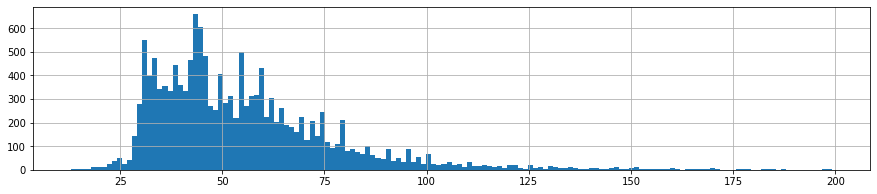

In [69]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

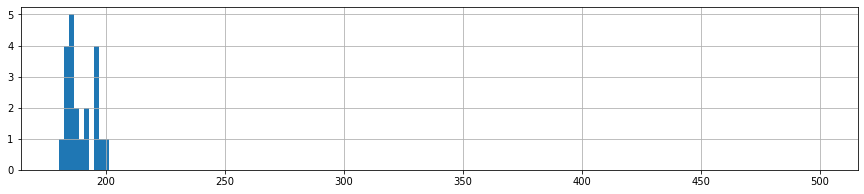

In [70]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [71]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,25.00,2.50,3.00,"950,000.00",13.00,5.00,1.00,2.00
0.5,2.00,50.00,2.73,58.00,"4,450,000.00",30.00,8.20,4.00,9.00
0.9,3.00,83.00,2.92,142.00,"9,002,000.00",50.60,14.00,10.00,16.00
0.9976,6.00,170.69,4.00,179.00,"22,615,301.27",112.00,27.90,18.00,20.00


### Посчитайте и добавьте в таблицу новые столбцы

In [72]:
data['price_one_square_metr'] = data['last_price'] / data['total_area']
print(data.info())
data['price_one_square_metr'] = data['price_one_square_metr'].astype('Float64')
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14680 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           14680 non-null  int64         
 1   last_price             14680 non-null  float64       
 2   total_area             14680 non-null  Float64       
 3   first_day_exposition   14680 non-null  datetime64[ns]
 4   rooms                  14680 non-null  int64         
 5   ceiling_height         14680 non-null  float64       
 6   floors_total           14680 non-null  float64       
 7   living_area            13410 non-null  Float64       
 8   floor                  14680 non-null  int64         
 9   is_apartment           14680 non-null  bool          
 10  studio                 14680 non-null  bool          
 11  open_plan              14680 non-null  bool          
 12  kitchen_area           14680 non-null  Float64       
 13  b

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_metr
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>,120370.37037
1,7,3350000.0,40.4,2018-12-04,1,2.73,11.0,18.6,1,False,...,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
5,10,2890000.0,30.4,2018-09-10,1,2.73,12.0,14.4,5,False,...,NaN,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,NaN,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525
11,9,3300000.0,44.0,2018-08-27,2,2.73,5.0,31.0,4,False,...,1.0,ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000.0


Добавил новый столбец в таблицу с ценой одного квадратного метра квартиры, затем заменил тип данных на int, и посмотрел первых 5 значений.

In [73]:
data['price_one_square_metr'].mean().round()

94033.0

В итоге средняя цена за 1 квадратный метр равна почти 100тыс. рублей.

In [74]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_metr,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,<NA>,120370.37037,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.73,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
5,10,2890000.0,30.4,2018-09-10,1,2.73,12.0,14.4,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017
11,9,3300000.0,44.0,2018-08-27,2,2.73,5.0,31.0,4,False,...,51677.0,0.0,NaN,0.0,NaN,7.0,75000.0,0,8,2018


Добавил  в таблицу 3 столбца с значениями дня недели, месяца и года, также чтобы получить эти значения сначало пришлось их представить в типе вида DatetimeIndex(dt), чтобы получить данные, и вывел первые 5 значений таблицы, чтобы проверить.

In [75]:
data['year_exposition'].value_counts()

2018    6296
2017    4786
2019    2545
2016     988
2015      53
2014      12
Name: year_exposition, dtype: int64

Также решил посмотреть в какие года было больше всего объявлений о продаже квартир, и выяснил что в 2017 и 2018 годах самое большое количество обявлений, а уже в 2019 году количество обявлений сократилось почти в 4 раза.

In [76]:
data['type_floor'] = data['floor']
data.loc[data['type_floor'] == 1, 'type_floor'] = 'Первый'
data.loc[(data['floors_total'] / data['floor']) == 1, 'type_floor'] = 'Последний'
data.loc[(data['type_floor'] != 'Первый') & (data['type_floor'] != 'Последний'), 'type_floor'] = 'Другой'
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_metr,day_exposition,month_exposition,year_exposition,type_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,<NA>,120370.37037,3,3,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,2.73,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,Первый
5,10,2890000.0,30.4,2018-09-10,1,2.73,12.0,14.4,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,Другой
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,Другой
11,9,3300000.0,44.0,2018-08-27,2,2.73,5.0,31.0,4,False,...,0.0,NaN,0.0,NaN,7.0,75000.0,0,8,2018,Другой


Создал столбец с типом этажа квартиры, и проверял если этаж равен 1, то логично будет первый этаж, затем проверял если количество всех этажей деленое на этаж равняется 1, то значит это последний этаж, т.к. к примеру если у нас всего 9 этажей и наша квартира находится на 9 этаже, то при делении как раз получится 1, а все остальные значения если не равняются первому и последнему этажу, значит принимали значение другие.

In [77]:
data['type_floor'].value_counts()

Другой       10536
Последний     2226
Первый        1918
Name: type_floor, dtype: int64

Также решил посмотреть каких этажей больше продано в обявлениях, и сделал вывод то что первый и последний этаж менее привлекательны пользователям, чем другие.

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14680 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           14680 non-null  int64         
 1   last_price             14680 non-null  float64       
 2   total_area             14680 non-null  Float64       
 3   first_day_exposition   14680 non-null  datetime64[ns]
 4   rooms                  14680 non-null  int64         
 5   ceiling_height         14680 non-null  float64       
 6   floors_total           14680 non-null  float64       
 7   living_area            13410 non-null  Float64       
 8   floor                  14680 non-null  int64         
 9   is_apartment           14680 non-null  bool          
 10  studio                 14680 non-null  bool          
 11  open_plan              14680 non-null  bool          
 12  kitchen_area           14680 non-null  Float64       
 13  b

In [79]:
data['city_centers_nearest'] = (data['city_centers_nearest']/1000).round()
# .astype('Int64')
data['city_centers_nearest']

0        16.0
1        19.0
5         NaN
10       14.0
11       52.0
         ... 
23690     6.0
23694     4.0
23695     NaN
23696     NaN
23698     NaN
Name: city_centers_nearest, Length: 14680, dtype: float64

### Проведите исследовательский анализ данных

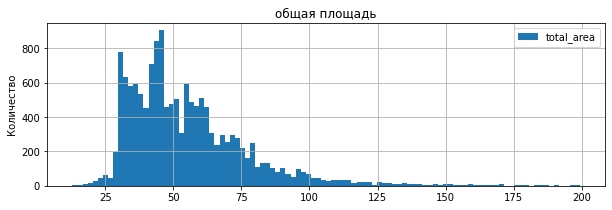

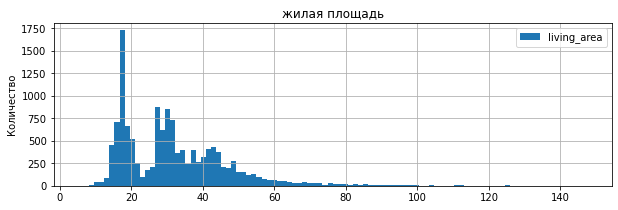

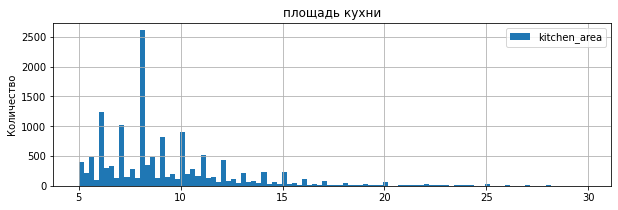

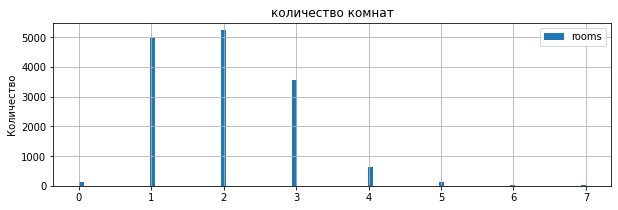

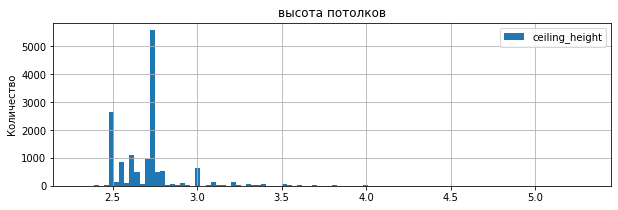

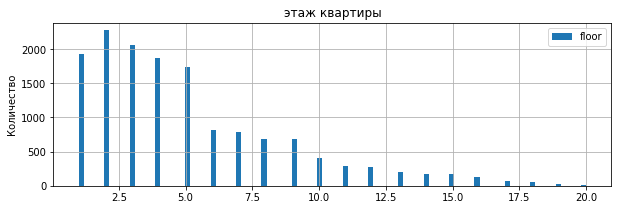

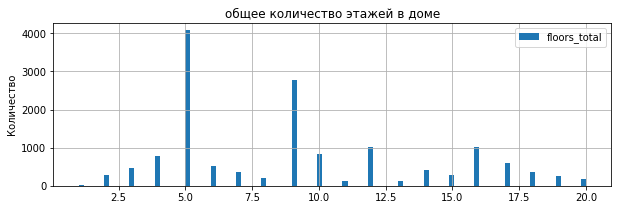

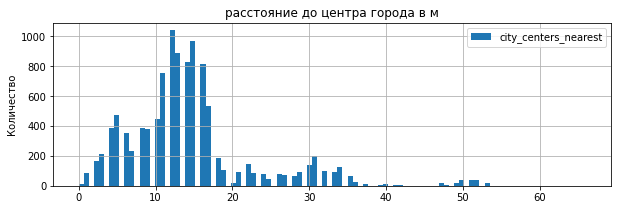

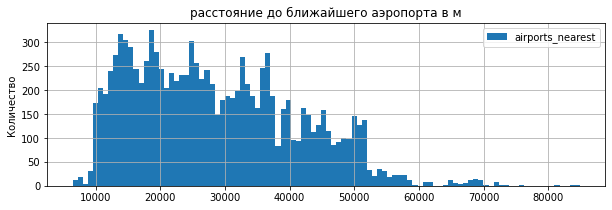

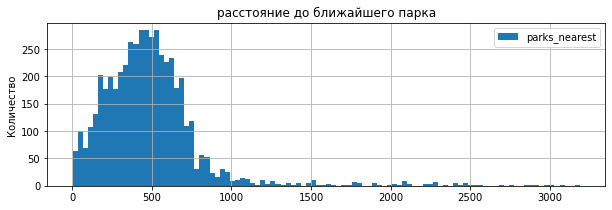

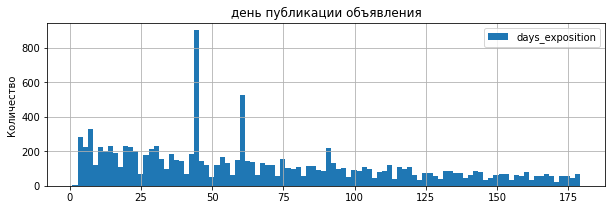

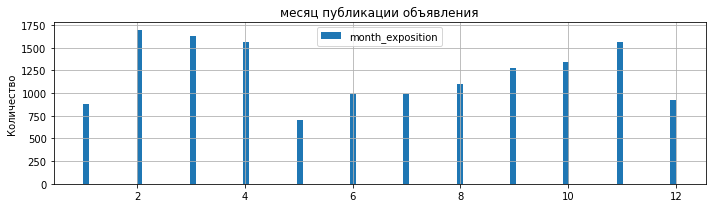

In [80]:
columns = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', 'floor',
         'floors_total', 'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'days_exposition', 'month_exposition']
names = ['общая площадь', 'жилая площадь', 'площадь кухни', 'количество комнат', 'высота потолков', 
         'этаж квартиры', 'общее количество этажей в доме', 'расстояние до центра города в м',
         'расстояние до ближайшего аэропорта в м', 'расстояние до ближайшего парка', 'день публикации объявления',
         'месяц публикации объявления']
for i in range(len(columns)):
    data.plot(kind='hist',
             y=columns[i],
             title=names[i],
             legend=True,
             grid=True,
             bins=100,
             figsize = (10, 3))
    plt.ylabel('Количество')
plt.tight_layout()
plt.show()

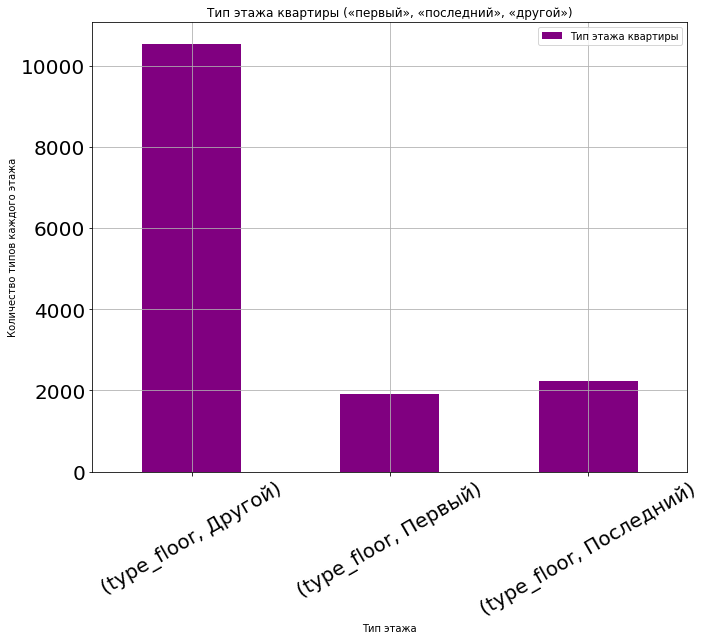

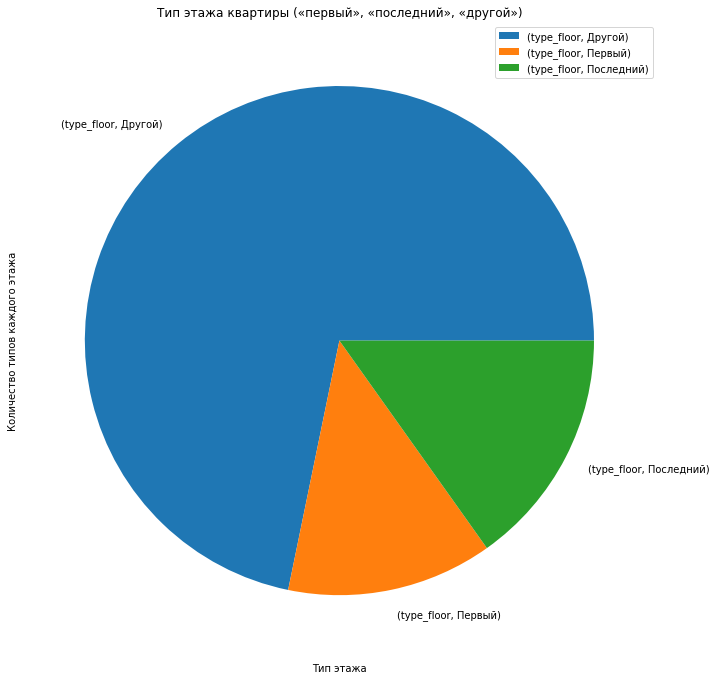

In [81]:
data.groupby(['type_floor']).agg({'type_floor':'count'}).unstack() \
                       .plot(kind = 'bar', y = 'type_floor', legend = True, \
                       label = 'Тип этажа квартиры', figsize = (10, 9), \
                       fontsize = 20, grid=True, color='purple')
plt.xticks(rotation=30)
plt.title('Тип этажа квартиры («первый», «последний», «другой»)')
plt.ylabel('Количество типов каждого этажа')
plt.xlabel('Тип этажа')
plt.tight_layout()
plt.show()

data.groupby(['type_floor']).agg({'type_floor':'count'}).unstack() \
                       .plot(kind = 'pie', x='last_price', y = 'type_floor', legend = True, \
                       label = 'Зависимость цены от этажа расположения квартиры', figsize = (10, 10), \
                       grid=True)
plt.xticks(rotation=30)
plt.title('Тип этажа квартиры («первый», «последний», «другой»)')
plt.ylabel('Количество типов каждого этажа')
plt.xlabel('Тип этажа')
plt.tight_layout()
plt.show()

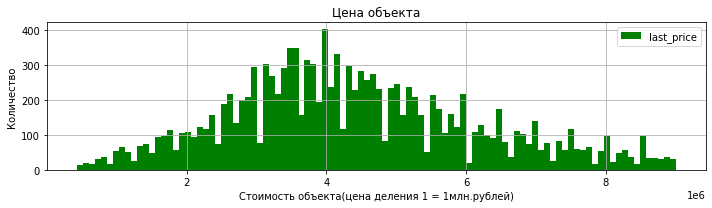

In [82]:
new_data = data.query('last_price < 9000000')
new_data.plot(kind = 'hist', y='last_price', bins = 100, color = 'green', legend = True, \
                     figsize = (10, 3), grid=True)
plt.title('Цена объекта')
plt.ylabel('Количество')
plt.xlabel('Стоимость объекта(цена деления 1 = 1млн.рублей)')
plt.tight_layout()
plt.show()

**Наблюдения по гистограммам:**
* На гистограмме с общей площадью видно, что большее скопление столбцов в диапозоне от ~40 до ~100.
* На гистограмме с жилой площадью видно, что большее скопление столбцов в диапозоне от ~20 до ~25, потом резкий спад, а затем опять большое количество столбцов в диапозоне от ~30 до ~50.
* На гистограмме с площадью кухни видно, что большее скопление столбцов в диапозоне от ~5 до ~12.
* На гистограмме с количеством комнат видно, что больше всего квартир с 1, 2, 3 комнатами.
* На гистограмме с высотой потолков видно, что большее всего квартир с потолками ~2,75м.
* На гистограмме с этажами квартиры видно, что большее всего объявлений о продаже квартир, которые находятся на первых пяти этажах.
* На гистограмме с общим количеством этажей в доме видно, что больше всего 5 этажных и 9 этажных домов.
* На гистограмме с расстоянием до центра города видно, что большее количество ближайшие парков находится в ~10-17км.
* На гистограмме с расстоянием до ближайших аэропортов видно, что большее количество аэропотов находится в ~10-27км.
* На гистограмме с расстоянием до ближайших парков видно, что большее количество парков находятся в 500м, а 0 означает, что рядом парков нету.
* На гистограмме с днем публикации объявлений видно, что в 5(6) и 6(7) день недели публиковали объявлений примерно в ~2 раза меньше чем во все остальные дни.
* На гистограмме с типами этажей квартиры видно, что больше было публикаций во 2 и 3 месяце, а меньше всего в 5.
* На гистограмме с ценой объекта видно, что большее скопление столбцов в диапозоне от 3 до 5.
* На гистограмме с типами этажа квартиры видно, что количество типа 'Другой' больше в ~7 раз чем типа 'Первый' или 'Последний'.

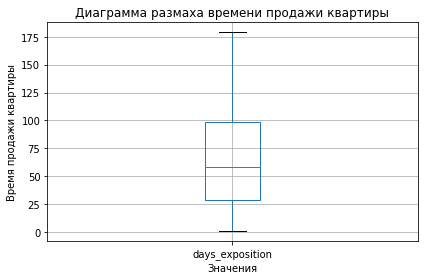

In [83]:
data.boxplot('days_exposition')
plt.ylabel('Время продажи квартиры')
plt.xlabel('Значения')
plt.title('Диаграмма размаха времени продажи квартиры')

plt.tight_layout()
plt.show()

In [84]:
new_data = data.query('days_exposition < 500')
new_data['days_exposition'].agg(['mean','median'])

mean      67.276084
median    58.000000
Name: days_exposition, dtype: float64

На диаграмме можно увидеть, что все значения, которы больше 250 это выбросы(нестандартные значения), следовательно их лучше убрать, т.к. они очень сильно поменяют среднее значение по времени продажи квартиры.

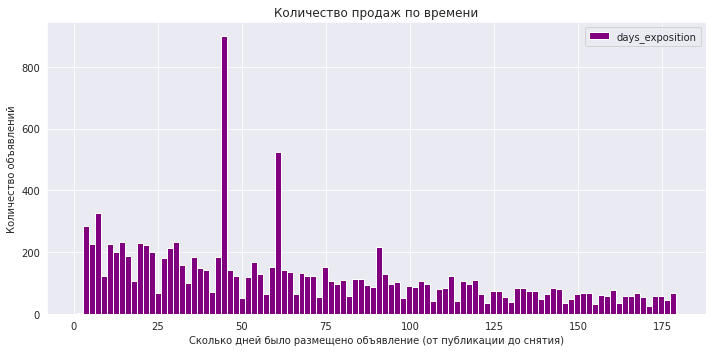

count    11942.000000
mean        67.276084
std         47.100716
min          1.000000
25%         29.000000
50%         58.000000
75%         99.000000
max        179.000000
Name: days_exposition, dtype: float64

In [85]:
sns.set_style("darkgrid")
new_data.plot(kind='hist', y='days_exposition', title='Количество продаж по времени', bins=100, figsize=(10,5), \
          grid=True, color='purple')

plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.tight_layout()
plt.show()
new_data.days_exposition.describe()

На гистограмме видно сильно выбивающиеся значения, и тогда я решил посмотреть правила размещения объявлений в Яндекс Недвижимости, и узнал, что есть сроки публикации: объявления квартир стоимостью до 4,5 млн. будут висеть 45 дней, объявления квартир от 4,5 млн. до 10 млн. будут висеть 60 дней, а объявления квартир стоимостью от 10 млн. висят 90 дней, затем все объявления удаляются автоматически по истечению срока, если их не уберут раньше владельцы. Значит на гистограмме эти значения можно не учитывать. Следовательно объявления, которые убрали до 45 дней есть два варианта почему: либо купили квартиру, поэтому убрали объявление, либо передумали продавать квартиру. Продажи можно считать быстрыми по 25-ому квантилю, который равен 29 дней, а необычно долгими можно считать по 75-ому квантилю, который равен 98 дней. В среднем продажа среднестатистичекой квартиры занимает 2 месяца в зависимотсти от различных факторов.

In [86]:
# check
data['days_exposition'].describe()

count    11942.000000
mean        67.276084
std         47.100716
min          1.000000
25%         29.000000
50%         58.000000
75%         99.000000
max        179.000000
Name: days_exposition, dtype: float64

#### 4.3

In [88]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14680 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           14680 non-null  int64         
 1   last_price             14680 non-null  float64       
 2   total_area             14680 non-null  Float64       
 3   first_day_exposition   14680 non-null  datetime64[ns]
 4   rooms                  14680 non-null  int64         
 5   ceiling_height         14680 non-null  float64       
 6   floors_total           14680 non-null  float64       
 7   living_area            13410 non-null  Float64       
 8   floor                  14680 non-null  int64         
 9   is_apartment           14680 non-null  bool          
 10  studio                 14680 non-null  bool          
 11  open_plan              14680 non-null  bool          
 12  kitchen_area           14680 non-null  Float64       
 13  b

,last_price,total_area
last_price,1.000000,0.763993
total_area,0.763993,1.000000


,last_price,total_area
last_price,1.000000,0.607243
total_area,0.607243,1.000000


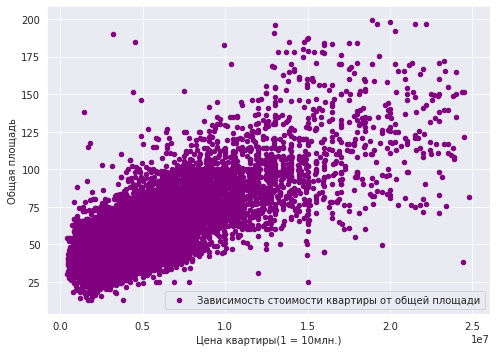

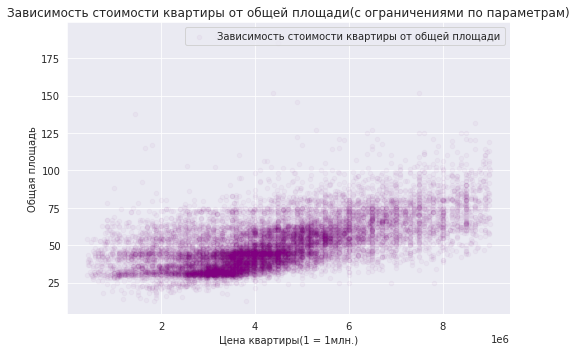

In [89]:
data.plot(kind='scatter', x='last_price', y='total_area', grid=True, label='Зависимость стоимости квартиры от общей площади',
         legend=True, color='purple', figsize=(7, 5))
plt.xlabel('Цена квартиры(1 = 10млн.)')
plt.ylabel('Общая площадь')
plt.tight_layout()

display(data[['last_price', 'total_area']].corr())

new_data = data.query('total_area < 200')
new_data = data.query('last_price < 9000000')
new_data.plot(kind='scatter', x='last_price', y='total_area', grid=True, 
         label='Зависимость стоимости квартиры от общей площади',
         legend=True, color='purple', figsize=(7, 5), alpha=0.03)
plt.title('Зависимость стоимости квартиры от общей площади(с ограничениями по параметрам)')
plt.xlabel('Цена квартиры(1 = 1млн.)')
plt.ylabel('Общая площадь')
plt.tight_layout()

display(new_data[['last_price', 'total_area']].corr())

In [90]:
# check

display(data[['last_price', 'total_area']].corr())
new_data[['last_price', 'total_area']].corr()

,last_price,total_area
last_price,1.000000,0.763993
total_area,0.763993,1.000000


,last_price,total_area
last_price,1.000000,0.607243
total_area,0.607243,1.000000


Я вижу сильную линейную зависимость между общей площадью и ценой.

,last_price,living_area
last_price,1.000000,0.669101
living_area,0.669101,1.000000


,last_price,living_area
last_price,1.000000,0.508398
living_area,0.508398,1.000000


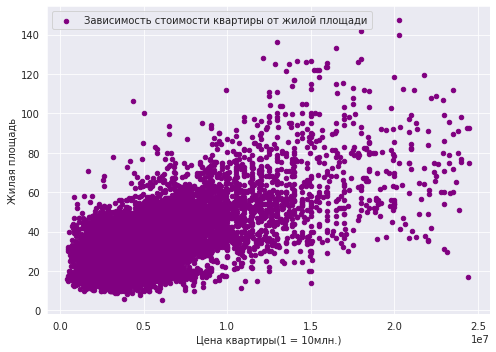

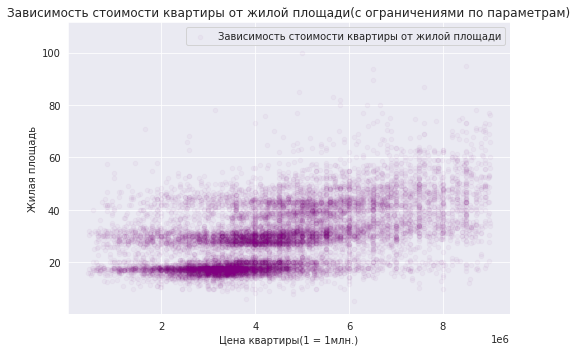

In [91]:
data.plot(kind='scatter', x='last_price', y='living_area', grid=True, label='Зависимость стоимости квартиры от жилой площади',
         legend=True, color='purple', figsize=(7, 5))
plt.xlabel('Цена квартиры(1 = 10млн.)')
plt.ylabel('Жилая площадь')
plt.tight_layout()

display(data[['last_price', 'living_area']].corr())
living_data = data.query('living_area < 100')
living_data = data.query('last_price < 9000000')
living_data.plot(kind='scatter', x='last_price', y='living_area', 
         grid=True, label='Зависимость стоимости квартиры от жилой площади',
         legend=True, color='purple', figsize=(7, 5), alpha=0.03)
plt.title('Зависимость стоимости квартиры от жилой площади(с ограничениями по параметрам)')
plt.xlabel('Цена квартиры(1 = 1млн.)')
plt.ylabel('Жилая площадь')
plt.tight_layout()

display(living_data[['last_price', 'living_area']].corr())

Я вижу среднюю линейную зависимость между жилой площадью и ценой.

,last_price,kitchen_area
last_price,1.000000,0.384849
kitchen_area,0.384849,1.000000


,last_price,kitchen_area
last_price,1.000000,0.384849
kitchen_area,0.384849,1.000000


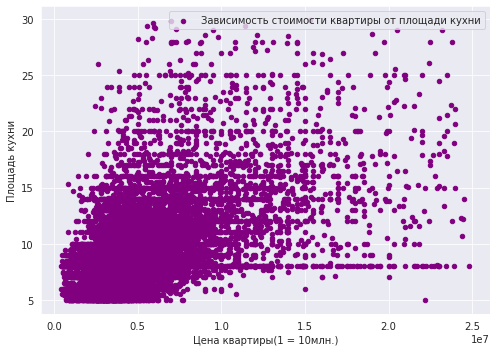

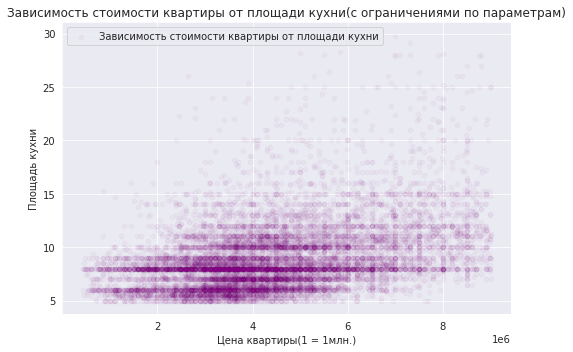

In [92]:
data.plot(kind='scatter', x='last_price', y='kitchen_area', grid=True, label='Зависимость стоимости квартиры от площади кухни',
         legend=True, color='purple', figsize=(7, 5))
plt.xlabel('Цена квартиры(1 = 10млн.)')
plt.ylabel('Площадь кухни')
plt.tight_layout()

display(living_data[['last_price', 'kitchen_area']].corr())
kitchen_data = data.query('kitchen_area < 50')
kitchen_data = data.query('last_price < 9000000')
kitchen_data.plot(kind='scatter', x='last_price', y='kitchen_area', 
         grid=True, label='Зависимость стоимости квартиры от площади кухни',
         legend=True, color='purple', figsize=(7, 5), alpha=0.03)
plt.title('Зависимость стоимости квартиры от площади кухни(с ограничениями по параметрам)')
plt.xlabel('Цена квартиры(1 = 1млн.)')
plt.ylabel('Площадь кухни')
plt.tight_layout()

display(kitchen_data[['last_price', 'kitchen_area']].corr())

Слабая зависимость между площадью кухни и ценой.

,last_price,rooms
last_price,1.000000,0.487552
rooms,0.487552,1.000000


,last_price,rooms
last_price,1.000000,0.404996
rooms,0.404996,1.000000


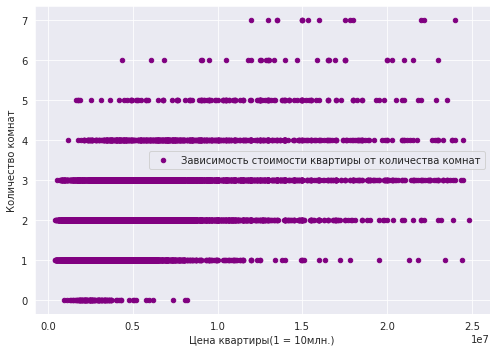

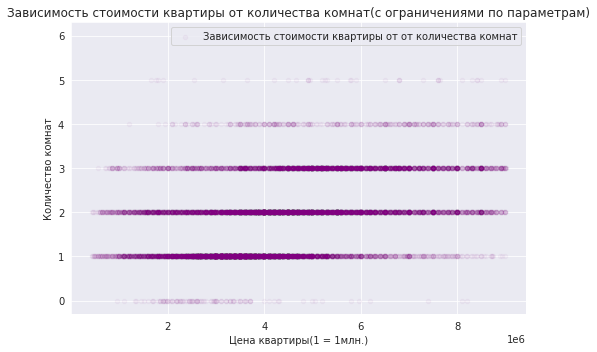

In [93]:
data.plot(kind='scatter', x='last_price', y='rooms', grid=True, label='Зависимость стоимости квартиры от количества комнат',
         legend=True, color='purple', figsize=(7, 5))
plt.xlabel('Цена квартиры(1 = 10млн.)')
plt.ylabel('Количество комнат')
plt.tight_layout()

display(data[['last_price', 'rooms']].corr())
rooms_data = data.query('rooms < 6')
rooms_data = data.query('last_price < 9000000')
rooms_data.plot(kind='scatter', x='last_price', y='rooms', 
         grid=True, label='Зависимость стоимости квартиры от от количества комнат',
         legend=True, color='purple', figsize=(7, 5), alpha=0.03)
plt.title('Зависимость стоимости квартиры от количества комнат(с ограничениями по параметрам)')
plt.xlabel('Цена квартиры(1 = 1млн.)')
plt.ylabel('Количество комнат')
plt.tight_layout()

display(rooms_data[['last_price', 'rooms']].corr())

Слабая зависимость между ценой и количеством комнат.

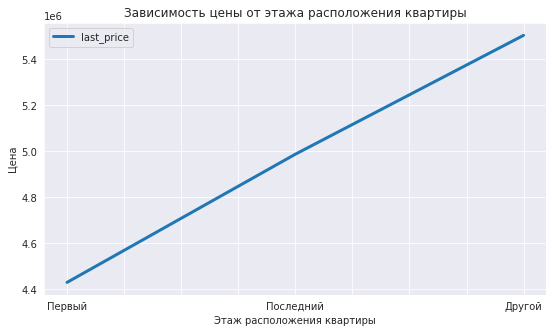

In [94]:

(data
     .pivot_table(index='type_floor', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5), linewidth=3, title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

Квартиры на первых этажах имеют меньшую стоимость, чем квартиры на других этажах.

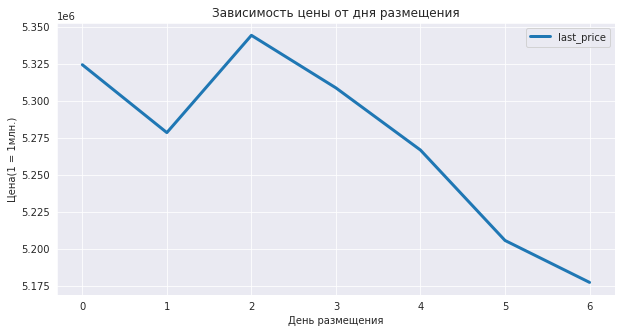

,last_price,day_exposition
last_price,1.000000,-0.010897
day_exposition,-0.010897,1.000000


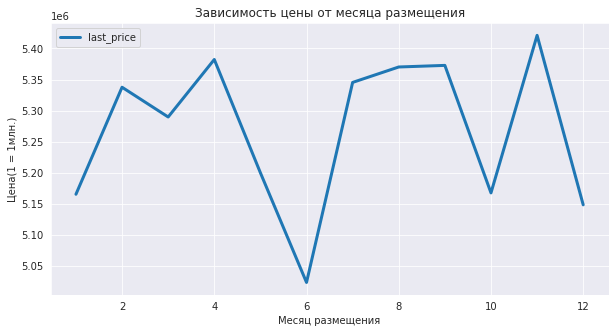

,last_price,month_exposition
last_price,1.000000,0.000905
month_exposition,0.000905,1.000000


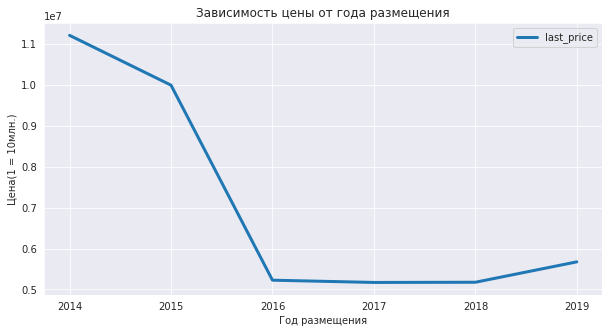

,last_price,year_exposition
last_price,1.000000,0.015085
year_exposition,0.015085,1.000000


In [95]:

(data
     .pivot_table(index='day_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5), linewidth=3, title='Зависимость цены от дня размещения')
)
plt.xlabel('День размещения')
plt.ylabel('Цена(1 = 1млн.)')

plt.show()
display(data[['last_price', 'day_exposition']].corr())

(data
     .pivot_table(index='month_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5), linewidth=3, title='Зависимость цены от месяца размещения')
)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена(1 = 1млн.)')

plt.show()
display(data[['last_price', 'month_exposition']].corr())

(data
     .pivot_table(index='year_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5), linewidth=3, title='Зависимость цены от года размещения')
)
plt.xlabel('Год размещения')
plt.ylabel('Цена(1 = 10млн.)')

plt.show()
display(data[['last_price', 'year_exposition']].corr())

Глядя на корреляцию по дате размещения, которая почти что равна 0, можно точно сказать, что зависимости от дня недели, месяца или года размещения объявления нету.

#### 4.4

In [96]:
top_ten_locality = data.pivot_table(index='locality_name', values='price_one_square_metr', \
                                    aggfunc='count').sort_values(by='price_one_square_metr', ascending=False).head(10)
top_ten_locality.columns = ['count_advertisement']
top_ten_locality['mean_price_one_square_metr'] = data.pivot_table(index='locality_name', values='price_one_square_metr', \
                                                           aggfunc='mean')
mean_ten_locality = top_ten_locality.style.format({'mean_price_one_square_metr':'{:.2f} ₽'})

mean_ten_locality.highlight_max(color='green', subset='mean_price_one_square_metr') \
    .highlight_min(color='red', subset='mean_price_one_square_metr')

mean_ten_locality

,count_advertisement,mean_price_one_square_metr
locality_name,,
санкт-петербург,9567,108745.14 ₽
всеволожск,267,69491.90 ₽
колпино,255,75828.19 ₽
посёлок мурино,244,83342.03 ₽
пушкин,237,101610.05 ₽
посёлок шушары,234,78569.64 ₽
гатчина,216,69570.64 ₽
выборг,162,58615.67 ₽
петергоф,138,85626.59 ₽


В Санкт-Петербурге цена одного квадратного метра, дороже чем в его окрайнах. Зеленым цветом выделил ячейку с самым дорогим квадратным метром, а красным цветом ячейку с самой низкой стоимостью квадратного метра.

#### 4.5

Средняя цена для каждого километра составляет 535169 ₽


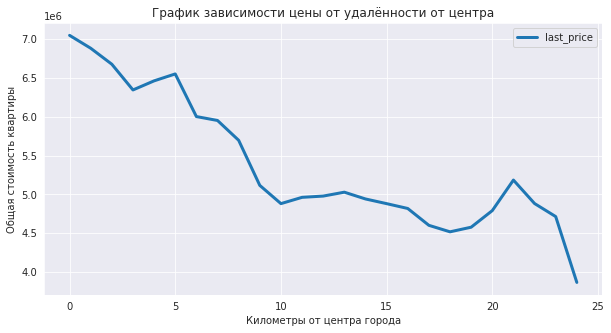

,price_km
city_centers_nearest,
0.0,inf
1.0,1.069882e+07
2.0,5.041634e+06
3.0,3.067909e+06
4.0,2.373108e+06
5.0,1.936599e+06
6.0,1.460661e+06
7.0,1.102720e+06
8.0,1.025801e+06


In [97]:
name_spb = data.loc[data['locality_name'] == 'санкт-петербург']
name_spb['city_centers_nearest'].isna().sum()
name_spb = name_spb.dropna(subset=['city_centers_nearest'])

name_spb.head()

mean_price_one_km = name_spb['last_price'].sum() / name_spb['city_centers_nearest'].sum()
print('Средняя цена для каждого километра составляет {:.0f} ₽'.format(mean_price_one_km))

name_spb = name_spb.loc[name_spb['city_centers_nearest'] < 25]
new_price_spb = name_spb.query('last_price < 9000000')
new_price_spb.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True, \
        linewidth=3, title='График зависимости цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Общая стоимость квартиры')
plt.show()

name_spb['price_km'] = name_spb['last_price'] / name_spb['city_centers_nearest']
mean_km_price_spb = name_spb.pivot_table(index='city_centers_nearest', values='price_km')
mean_km_price_spb 

Чем дальше от центра города, тем дешевле квартира. Я нашел среднюю цену одного километра удаленного от центра, она равна 518490 ₽.

In [98]:
# check
data['city_centers_nearest'] 

0        16.0
1        19.0
5         NaN
10       14.0
11       52.0
         ... 
23690     6.0
23694     4.0
23695     NaN
23696     NaN
23698     NaN
Name: city_centers_nearest, Length: 14680, dtype: float64

### Общий вывод

Я собрал данные о объявлениях продаж квартир в Санкт- Петербурге и его окрестностях, обработал их и удалил пропуски там где это необходимо. Кое какие данные я заполнил средним значением, дабы не терять основной поток статистических данных и некоторые из них оставил без изменений.Заменил типы данных на необходимые для удобной работы. Хотелось что бы люди при отправке заполняли все ячейки и было меньше пропусков и данные из программ выгружались корректно.

В этом проекте я посчитал среднюю цену квадратного метра в самом городе Санкт-Петербурге и в его окрестностях. Узнал что самый дорогой метр в центре Питера и чем дальше от центра, тем дешевле стоимость квартиры и цена за один метр.

Выявил закономерность, что чем больше общая площадь квартиры, тем больше её общая стоимость.

Квартиры на первом этаже продают дешевле, чем аналогичные квартиры на других этажах.

Площадь кухни и количество комнат в квартире не сильно влияют на изменение общей стоимости. Но однокомнатные и двухкомнатные квартиры с потолками 273см чаще пользуются спросом.

Большое количество объявлений о продаже квартир, которые находятся в самом городе Санкт- Петербурге и продаются они в среднем за 2 месяца после выхода объявления. Дни недели, месяц и год выхода объявления не влияют на скорость продажи и ее стоимость.
Для большей наглядности я построил много графиков зависимости цены от разных факторов и самыми важными из них оказались общая площадь и удалённость от центра города, а квартиры на первом этаже оказались самыми дешевыми.

### Бонус

In [ ]:
# check
import seaborn as sns

In [ ]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.gcf().set_size_inches(12,12);


In [ ]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

In [ ]:
# check
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df_check.info()
df_isna = df_check.query('airports_nearest.isna() | airports_nearest < 60000')
df_isna.info()

In [ ]:
# check
df_check = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
df_check.info()
df_isna = df_check[(df_check ['airports_nearest'] < 60000) | (df_check ['airports_nearest'].isna()) ]

df_isna.info()